goal is to get the total number of galaxies that we have targeted so far.


We compiled the list in a google sheet

https://docs.google.com/spreadsheets/d/1qNwKZ_BA6R42wpKALCpNAWE2EBqoiqXGgZPxupdKMsI/edit?usp=sharing

The third sheet has a list of the centers for each group.

Becky sent the RASSCALS and WBL catalogs, so I can search these to get the central redshift of each group.

The catalogs are in 

/Users/rfinn/Dropbox/Research/HalphaGroups/catalogs

and include:
* RASSCALS_groups_positions.fits 
* WBL_groups_positions.fits
* UAT_group_centers.csv

In [1]:
from astropy.io import fits
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
catalog_dir = '/Users/rfinn/myDropbox/Research/HalphaGroups/catalogs/'

### Read in data files###

In [3]:
rasscals_file = 'RASSCALS_groups_positions.fits'
wbl_file = 'WBL_groups_positions.fits'
groups_file = 'UAT_group_centers.csv'

In [4]:
rasc = fits.getdata(catalog_dir+rasscals_file,1)
wbl = fits.getdata(catalog_dir+wbl_file,1)
gc = ascii.read(catalog_dir+groups_file, delimiter=',')

In [5]:
group_coord = SkyCoord(gc['RA'],gc['Dec'], unit=(u.hourangle,u.deg),frame='icrs')

In [6]:
gc['Filter'][0]

'ha16'

In [9]:
%run ~/github/HalphaImaging/uat_all_galaxies_fov.py

## Looking at our galaxies relative to NSA ##

In [10]:
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
catalog_dir = '/Users/rfinn/myDropbox/Research/HalphaGroups/catalogs/'
plot_dir = '/Users/rfinn/myDropbox/Research/HalphaGroups/plots/'

In [12]:
ha = fits.getdata(catalog_dir+'uat_halpha_nsa.fits')
mstar = fits.getdata(catalog_dir+'uat_halpha_moustakas_mstar.fits')
nsa = fits.getdata('/Users/rfinn/research/NSA/nsa_v0_1_2.fits')
nsa_mstar = fits.getdata('/Users/rfinn/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits')

In [21]:
ha.size

2222

In [13]:
# NSA properties
NUVr = nsa.ABSMAG[:,1] - nsa.ABSMAG[:,4]
Mr = nsa.ABSMAG[:,4]
# Halpha sample
NUVr_ha = ha.ABSMAG[:,1] - ha.ABSMAG[:,4]
Mr_ha = ha.ABSMAG[:,4]

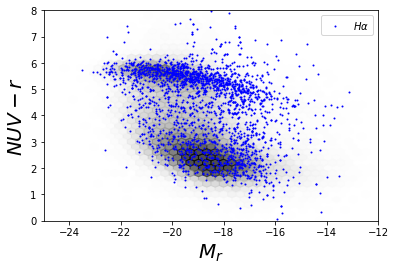

In [14]:
# make figure of NUV-r vs Mr
plt.figure()
plt.subplots_adjust(bottom=.15)
sp=plt.hexbin(Mr,NUVr,gridsize=(40,20),extent=(-25,-12,0,8),alpha=.7,cmap='gray_r',vmin=0,vmax=1000)
plt.plot(Mr_ha,NUVr_ha,'b.',markersize=2, label=r'$H\alpha$')
plt.axis([-25,-12,0,8])
plt.legend()
plt.xlabel('$M_r$',fontsize=20)
plt.ylabel('$NUV - r$',fontsize=20)
plt.savefig(plot_dir+'NUVr-Mr.pdf')

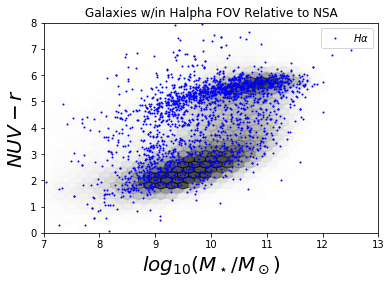

In [15]:
# make figure of NUV-r vs M*
plt.figure()
plt.subplots_adjust(bottom=.15)
sp=plt.hexbin(nsa_mstar.MSTAR_50,NUVr,extent=(6,14,0,8),gridsize=(40,20),alpha=.7,cmap='gray_r',vmin=0,vmax=1000)
plt.plot(mstar.MSTAR_50,NUVr_ha,'b.',markersize=2, label=r'$H\alpha$')
plt.axis([7,13,0,8])
plt.legend()
plt.xlabel('$log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel('$NUV - r$',fontsize=20)
plt.title('Galaxies w/in Halpha FOV Relative to NSA')
plt.savefig(plot_dir+'NUVr-Mstar.pdf')

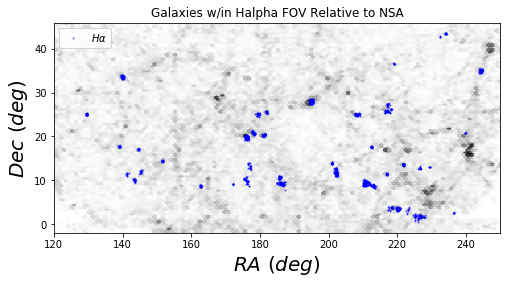

In [20]:
# make figure of NUV-r vs Mr
plt.figure(figsize=(8,4))
plt.subplots_adjust(bottom=.15)
sp=plt.hexbin(nsa.RA,nsa.DEC,gridsize=(300,100),alpha=.7,cmap='gray_r',vmin=0,vmax=100)
plt.plot(ha.RA,ha.DEC,'b.',markersize=2, label=r'$H\alpha$',alpha=0.5)
plt.axis([-25,-12,0,8])
plt.legend()
plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('Galaxies w/in Halpha FOV Relative to NSA')
plt.axis([120,250,-2,46])
plt.savefig(plot_dir+'positions.pdf')

In [17]:
co = fits.getdata('/Users/rfinn/github/Virgo/tables/CO-MasterFile-2018Feb16.fits')

## Virgo III Group ##

We realized that the NGC 5846 Group that Becky has been targeting is also a target in the Virgo Filaments study.

Below we show 

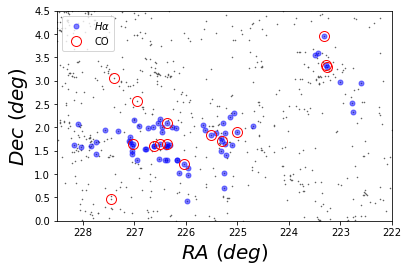

In [18]:
# NGC 5846 - Virgo 3
# plotting Halpha with CO detections
plt.figure()
plt.subplots_adjust(bottom=.15)
plt.plot(nsa.RA,nsa.DEC,'k.',markersize=1,color='0.3')#gridsize=(200,100),alpha=.7,cmap='gray_r',vmin=0,vmax=100)
plt.plot(ha.RA,ha.DEC,'bo',markersize=5, label=r'$H\alpha$',alpha=0.5)
plt.plot(co.RA,co.DEC,'ro', markersize=10,markerfacecolor='None', label='CO')
plt.axis([222,228.5,0,4.5])
plt.legend(loc='upper left')
plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.gca().invert_xaxis()
plt.savefig(plot_dir+'NGC5846-positions.pdf')